# Desigualdad y factores de éxito en pruebas Saber 11 en Colombia

**Autores:**  
    Luis Alejandro Quimbayo Suarez. 
    Julian Leonardo Garcia Pablos.  



## Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando métodos de librerías especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
5. Implementar análisis basado en modelos estadísticos o de *machine learning*.

##  Contexto: desigualdad y factores de éxito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (ej., matemáticas, física, inglés, etc.) y se lleva a cabo dos veces al año, ajustándose a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge información sociodemográfica y relacionada con la institución a la que pertenecen. El fin es obtener información con respecto al desempeño de los estudiantes en la prueba y de sus características.

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es la desigualdad y factores de éxito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.


* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.


* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

In [1]:
# Implementa tu respuesta en esta celda
import numpy as np
import pandas as pd
import os
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import interact
from datetime import datetime
import seaborn as sns
import plotly.graph_objects as go
import panel as pn
pn.extension('plotly')

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

import statsmodels.stats.api as sms

import panel as pn
import plotly.graph_objects as go
pn.extension('plotly')

**¿Existe alguna relación u efecto de las variables proxy de desigualdad recolectadas por el ICFES en el éxito en las pruebas Saber 11 en Colombia, para los periodos 2017 y 2018?**

Para dar una respuesta a esta pregunta, se analizará la información compartida por el ICFES en su repositorio institucional, cuyo proceso se documenta en el transcurso de este archivo, haciendo uso de herramientas analaiticas en Python.

**CARGUE DE ARCHIVOS PARA REALIZAR EL ANÁLISIS:**  
  
  La idea es cargar los diferentes archivos TXT para luego identificar los nombres de las columnas, los cuales corresponden a diferentes variables. Una vez identificados en cada archivo homologar los que contengan la misma información pero con variaciones en sus titulos.


In [2]:
SB11_2017_1 = pd.read_csv("SB11_20171.TXT", sep="¬")
SB11_2017_2 = pd.read_csv("SB11_20172.TXT", sep="¬")
SB11_2018_1 = pd.read_csv("SB11_20181.TXT", sep="¬")
SB11_2018_2 = pd.read_csv("SB11_20182.TXT", sep="¬")

C:\Users\57350\AppData\Local\Temp\ipykernel_13588\4024538139.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  SB11_2017_1 = pd.read_csv("SB11_20171.TXT", sep="¬")
C:\Users\57350\AppData\Local\Temp\ipykernel_13588\4024538139.py:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  SB11_2017_2 = pd.read_csv("SB11_20172.TXT", sep="¬")
C:\Users\57350\AppData\Local\Temp\ipykernel_13588\4024538139.py:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  SB11_2018_1 = pd.read_csv("SB1

Se obtienen los titulos de las columnas de los cuatro archivos, correspondientes a los periodos 1 y 2 de los años 2017 y 2018.  



In [4]:
columns_SB11_2017_1 = list(SB11_2017_1.columns.values)
columns_SB11_2017_2 = list(SB11_2017_2.columns.values)
columns_SB11_2018_1 = list(SB11_2018_1.columns.values)
columns_SB11_2018_2 = list(SB11_2018_2.columns.values)

**Comparación de titulos entre bases de datos de cada periodo del año 2017.**  

Titulos que están en el periodo 1 y que no están en el periodo 2:

In [5]:
dif_2017_1vs2 = list(set(columns_SB11_2017_1) - set(columns_SB11_2017_2))

Titulos que están en el periodo 2 y que no están en el periodo 1:

In [6]:
dif_2017_2vs1 = list(set(columns_SB11_2017_2) - set(columns_SB11_2017_1))

Se identifica que en el archivo del periodo 2 del año 2017 están todos los titulos del periodo 1. De igual forma se identifica que en el archivo del periodo 1 del año 2017 falta un titulo que sí está en el periodo 2 correspondien a 'ESTU_PILOPAGA'

In [7]:
print(dif_2017_1vs2)
print(dif_2017_2vs1)

[]
['ESTU_PILOPAGA']


Se cambia el nombre de la variable 'ESTU_PILOPAGA' por "BECA" la cual se encuentra en el archivo del periodo 2 del año 2017

In [8]:
SB11_2017_2.rename(columns={"ESTU_PILOPAGA" : "BECA"}, inplace=True)

Se procede a unir la dos bases de datos:

In [9]:
data2017= pd.concat([SB11_2017_1, SB11_2017_2], axis=0, join="outer")

**Comparación de titulos entre bases de datos de cada periodo del año 2018.**

Titulos que están en el periodo 1 y que no están en el periodo 2:

In [10]:
dif_2018_1vs2 = list(set(columns_SB11_2018_1) - set(columns_SB11_2018_2))

Titulos que están en el periodo 2 y que no están en el periodo 1:

In [11]:
dif_2018_2vs1 = list(set(columns_SB11_2018_2) - set(columns_SB11_2018_1))

Se identifica que en el archivo del periodo 2 del año 2018 hay dos titulos que no están entre los titulos del periodo 1. 
Estos corresponden a 'ESTU_GENERACION-E' y 'ESTU_LIMITA_MOTRIZ'

In [12]:
dif_2018_2vs1

['ESTU_LIMITA_MOTRIZ', 'ESTU_GENERACION-E']

Se identifica que en el archivo del periodo 1 del año 2018 hay un titulo que no está en el periodo 2. 
Este corresponde a 'ESTU_PILOPAGA'

In [13]:
dif_2018_1vs2

['ESTU_PILOPAGA']

Se cambia el nombre de la variable 'ESTU_GENERACION-E' del periodo 2 y 'ESTU_PILOPAGA' del periodo 1 por "BECA":

In [14]:
SB11_2018_1.rename(columns={"ESTU_PILOPAGA" : "BECA"}, inplace=True)
SB11_2018_2.rename(columns={"ESTU_GENERACION-E" : "BECA"}, inplace=True)

Se procede a unir la dos bases de datos:

In [15]:
data2018= pd.concat([SB11_2018_1, SB11_2018_2], axis=0, join="outer")

**Unimos las bases de datos del año 2017 y 2018**

In [16]:
data2018= pd.concat([data2017, data2018], axis=0, join="outer")

Una vez analizados los titulos de las cuatro bases de datos y hecho la concatenación en un solo archivo, se seleccionarán
variables que inicialmente se consideren  útiles para explicar el puntaje global de la prurba.  

Lista de variables:

In [17]:
variables = ['PERIODO', 'ESTU_NSE_INDIVIDUAL', 'ESTU_INSE_INDIVIDUAL', 
             'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_TRABAJOLABORMADRE', 
             'FAMI_TRABAJOLABORPADRE', 'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE', 
             'FAMI_COMELECHEDERIVADOS', 'FAMI_CUARTOSHOGAR', 'FAMI_ESTRATOVIVIENDA', 
             'FAMI_NUMLIBROS', 'FAMI_PERSONASHOGAR', 'FAMI_SITUACIONECONOMICA', 
             'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 
             'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 
             'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENESERVICIOTV', 'ESTU_NSE_ESTABLECIMIENTO', 
             'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO', 
             'COLE_CARACTER', 'COLE_DEPTO_UBICACION', 'COLE_GENERO', 
             'COLE_JORNADA', 'COLE_NATURALEZA', 
             'PUNT_GLOBAL', 'PUNT_C_NATURALES', 'PUNT_INGLES', 
             'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 
             'PUNT_SOCIALES_CIUDADANAS', 
             'ESTU_GENERO', 'ESTU_TIENEETNIA', 'ESTU_HORASSEMANATRABAJA', 
             'ESTU_DEDICACIONINTERNET', 'ESTU_DEDICACIONLECTURADIARIA',"BECA"]

Creamos un nuevo dataframe con las variables seleccionadas

In [18]:
data1 = data2018[variables]

Contamos cantidad de NA por variable:

In [19]:
data1.isnull().sum()

PERIODO                               0
ESTU_NSE_INDIVIDUAL               25807
ESTU_INSE_INDIVIDUAL              25807
FAMI_EDUCACIONMADRE               60498
FAMI_EDUCACIONPADRE               60692
FAMI_TRABAJOLABORMADRE            30665
FAMI_TRABAJOLABORPADRE            33605
FAMI_COMECARNEPESCADOHUEVO        64922
FAMI_COMECEREALFRUTOSLEGUMBRE     65760
FAMI_COMELECHEDERIVADOS           67049
FAMI_CUARTOSHOGAR                 28760
FAMI_ESTRATOVIVIENDA              67339
FAMI_NUMLIBROS                    75651
FAMI_PERSONASHOGAR                30596
FAMI_SITUACIONECONOMICA           27385
FAMI_TIENEAUTOMOVIL               31492
FAMI_TIENECOMPUTADOR              28817
FAMI_TIENECONSOLAVIDEOJUEGOS      31320
FAMI_TIENEHORNOMICROOGAS          30047
FAMI_TIENEINTERNET                61821
FAMI_TIENELAVADORA                28136
FAMI_TIENEMOTOCICLETA             29303
FAMI_TIENESERVICIOTV              65297
ESTU_NSE_ESTABLECIMIENTO           1702
COLE_AREA_UBICACION                   0


Note que la variable con más NAs (164.024) corresponde a "COLE_BILINGUE". Por lo tanto, sería de utilidad encontrar algún patrón de esta variable respecto a otras para realizar reemplazos y perder un catidad menor de datos.  
  
Hacemos el cálculo de cuantas filas perderiamos si no reemplazamos dichos NAs:

In [20]:
rows1 = len(data1.axes[0])-1

data2 = data1.copy()
data3 = data2.dropna()
data3.isnull().sum()
rows4 = len(data3.axes[0])-1
rows4
diferencia = (rows1-rows4)/rows1
diferencia

0.275370548999121

Ahora bien, perderiamos el 27.5% de las filas totales del dataset.

Buscamos patrones que nos puedan dar indicios del comportamiento de la variable "COLE_BILINGUE" y poder tratar los NAS:  
Para esto contrastamos la relación entre COLE_BILINGUE, PUNT_INGLES y el PUNT_GLOBAL.

<AxesSubplot:xlabel='PUNT_GLOBAL', ylabel='PUNT_INGLES'>

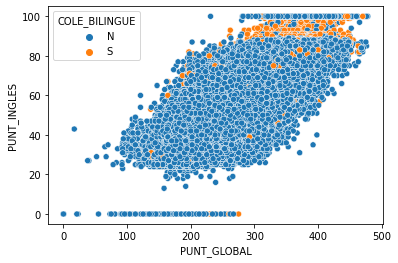

In [21]:
sns.scatterplot(x="PUNT_GLOBAL", y="PUNT_INGLES", hue="COLE_BILINGUE", data = data1)

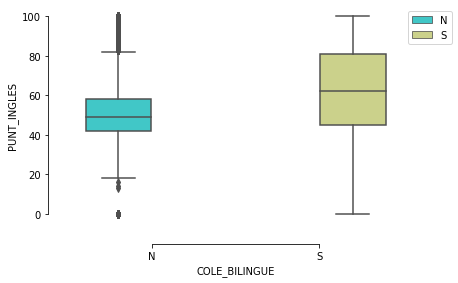

In [22]:
sns.boxplot(x="COLE_BILINGUE", y="PUNT_INGLES",hue="COLE_BILINGUE",data=data1,palette="rainbow")
sns.despine(offset=20, trim=True)
sns.figsize =(1, 200)
plt.legend(loc = 2, bbox_to_anchor = (1,1))

Vemos una diferencia marcada entre los resultados tanto del puntaje de la prueba de inglés como en el puntaje total.  
Por lo tanto identificamos la media del puntaje global y el cuartil 3 del puntaje de prueba de ingles. Posteriomente reemplazamos los NAs con "S" para las observaciones con un puntaje global mayor igual a 287 y puntaje de iglés mayor igual a 81. De lo contrario "N".

In [23]:
from numpy import mean
mean(data1[data1["COLE_BILINGUE"] == "S"]["PUNT_GLOBAL"])
data1[data1["COLE_BILINGUE"] == "S"]["PUNT_INGLES"].describe()[6]
data1.loc[(data1["COLE_BILINGUE"].isnull()) ,"COLE_BILINGUE"] = "completar"
data1.loc[(data1["COLE_BILINGUE"] == "completar") & (data1["PUNT_GLOBAL"] >= 287) & (data1["PUNT_INGLES"] >= 81) ,"COLE_BILINGUE"] = "S"
data1.loc[(data1["COLE_BILINGUE"] == "completar") & (data1["PUNT_GLOBAL"] <= 287) & (data1["PUNT_INGLES"] <= 81) ,"COLE_BILINGUE"] = "N"
data1.loc[(data1["COLE_BILINGUE"] == "completar") & (data1["PUNT_GLOBAL"] >= 287) & (data1["PUNT_INGLES"] <= 81) ,"COLE_BILINGUE"] = "N"
data1.loc[(data1["COLE_BILINGUE"] == "completar") & (data1["PUNT_GLOBAL"] <= 287) & (data1["PUNT_INGLES"] >= 81) ,"COLE_BILINGUE"] = "S"

Reemplazamos los tiderentes tipos de categorías en la variable "BECA" por "SI" y los nas por "NO"

In [24]:
tipos_becas = {'SER PILO PAGA - CREDITO CONDONABLE': "SI",'SER PILO PAGA - ETNIA': "SI",'SER PILO PAGA PAZCIFICO - CREDITO CONDONABLE': "SI",
 'SER PILO PAGA MOCOA - CREDITO CONDONABLE': "SI",'GENERACION E - GRATUIDAD': "SI", 'GENERACION E - EXCELENCIA NACIONAL': "SI",
 'GENERACION E - EXCELENCIA DEPARTAMENTAL': "SI"}
data1["BECA"] = data1["BECA"].replace(tipos_becas)
data1["BECA"] = data1["BECA"].replace({ np.nan : "NO"})
BECA = list(data1["BECA"].unique())

C:\Users\57350\AppData\Local\Temp\ipykernel_13588\2157794819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["BECA"] = data1["BECA"].replace(tipos_becas)
C:\Users\57350\AppData\Local\Temp\ipykernel_13588\2157794819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["BECA"] = data1["BECA"].replace({ np.nan : "NO"})


Eliminamos los NAs restantes y comparamos en cuanto se disminuye la muestra. 

In [25]:
data2 = data1.copy()
data3 = data2.dropna()
data3.isnull().sum()
rows2 = len(data3.axes[0])-1
diferencia2 = (rows1-rows2)/rows1
diferencia2

0.15635892928143894

Se observa que la muestra pasa de disminuir un 27.5% a disminuir tan solo un 15.6%

**Preguntas guía:**

¿Qué dimensiones tienen los datos?   
¿Con cuántos años y periodos de evaluación se cuenta?  
¿Cuáles variables pueden ser de interés para la problemática planteada?  
¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés?  ¿Qué planteas para manejarlos?

In [26]:
#Contar variables y observaciones de la base de datos
rows = len(data3.axes[0])-1
cols = len(data3.axes[1])-1

#Mostrar años y periodos de la base de datos:
an_pe=list(data3["PERIODO"].unique())

print("1. Número de observaciones: {:,}".format(rows)) 
print("\n")
print("2. Número de variables: {:,}".format(cols))
print("\n")
print("3. Años y periodos de evaluación:")
print(*an_pe, sep = ",")
print("\n")
print("4. Variables de interés:")
print(*variables, sep = ", ")
print("\n")
print("5. Se identificó un patrón en la variable COLE_BILINGUE para luego rellenar o liminar datos faltantes, actualmente no hay nan:")

data3.isnull().sum()

1. Número de observaciones: 946,324


2. Número de variables: 43


3. Años y periodos de evaluación:
20171,20172,20181,20182


4. Variables de interés:
PERIODO, ESTU_NSE_INDIVIDUAL, ESTU_INSE_INDIVIDUAL, FAMI_EDUCACIONMADRE, FAMI_EDUCACIONPADRE, FAMI_TRABAJOLABORMADRE, FAMI_TRABAJOLABORPADRE, FAMI_COMECARNEPESCADOHUEVO, FAMI_COMECEREALFRUTOSLEGUMBRE, FAMI_COMELECHEDERIVADOS, FAMI_CUARTOSHOGAR, FAMI_ESTRATOVIVIENDA, FAMI_NUMLIBROS, FAMI_PERSONASHOGAR, FAMI_SITUACIONECONOMICA, FAMI_TIENEAUTOMOVIL, FAMI_TIENECOMPUTADOR, FAMI_TIENECONSOLAVIDEOJUEGOS, FAMI_TIENEHORNOMICROOGAS, FAMI_TIENEINTERNET, FAMI_TIENELAVADORA, FAMI_TIENEMOTOCICLETA, FAMI_TIENESERVICIOTV, ESTU_NSE_ESTABLECIMIENTO, COLE_AREA_UBICACION, COLE_BILINGUE, COLE_CALENDARIO, COLE_CARACTER, COLE_DEPTO_UBICACION, COLE_GENERO, COLE_JORNADA, COLE_NATURALEZA, PUNT_GLOBAL, PUNT_C_NATURALES, PUNT_INGLES, PUNT_LECTURA_CRITICA, PUNT_MATEMATICAS, PUNT_SOCIALES_CIUDADANAS, ESTU_GENERO, ESTU_TIENEETNIA, ESTU_HORASSEMANATRABAJA, ESTU_DEDICA

PERIODO                          0
ESTU_NSE_INDIVIDUAL              0
ESTU_INSE_INDIVIDUAL             0
FAMI_EDUCACIONMADRE              0
FAMI_EDUCACIONPADRE              0
FAMI_TRABAJOLABORMADRE           0
FAMI_TRABAJOLABORPADRE           0
FAMI_COMECARNEPESCADOHUEVO       0
FAMI_COMECEREALFRUTOSLEGUMBRE    0
FAMI_COMELECHEDERIVADOS          0
FAMI_CUARTOSHOGAR                0
FAMI_ESTRATOVIVIENDA             0
FAMI_NUMLIBROS                   0
FAMI_PERSONASHOGAR               0
FAMI_SITUACIONECONOMICA          0
FAMI_TIENEAUTOMOVIL              0
FAMI_TIENECOMPUTADOR             0
FAMI_TIENECONSOLAVIDEOJUEGOS     0
FAMI_TIENEHORNOMICROOGAS         0
FAMI_TIENEINTERNET               0
FAMI_TIENELAVADORA               0
FAMI_TIENEMOTOCICLETA            0
FAMI_TIENESERVICIOTV             0
ESTU_NSE_ESTABLECIMIENTO         0
COLE_AREA_UBICACION              0
COLE_BILINGUE                    0
COLE_CALENDARIO                  0
COLE_CARACTER                    0
COLE_DEPTO_UBICACION

Si eliminamos las filas que contienen NAs nuestra muestra se reducirá en un 27.5%:

In [27]:
diferencia2
print("1. Número de observaciones de la base de datos con NAs: {:,}".format(rows1)) 
print("2. Número de observaciones de la base de datos eliminando filas con NAs: {:,}".format(rows2))
print("3. Porcentaje de reducción de la muestra al eliminar los NAs: {:,} %".format(float(diferencia2*100)))

1. Número de observaciones de la base de datos con NAs: 1,121,714
2. Número de observaciones de la base de datos eliminando filas con NAs: 946,324
3. Porcentaje de reducción de la muestra al eliminar los NAs: 15.635892928143894 %


## Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

Se realiza la programación de una serie de funciones para realizar gráficas y observar relaciones entre variables:

In [46]:
def pastel(variable, title):
    etiquetas = list(data3[variable].unique())
    valores = list(data3[variable].value_counts())
    gra_genero = plt.pie(valores, labels = etiquetas, autopct="%0.1f %%")
    plt.title(title)
    plt.axis("equal")
    plt.show()
    
def cajas(x, y, z,  titulo):
    sns.boxplot(x=x, y=y,hue=z,data=data3,palette="rainbow").set_title(titulo, fontdict = { 'fontsize': 15})
    sns.despine(offset=20, trim=True)
    sns.figsize =(1, 200)
    plt.legend(loc = 2, bbox_to_anchor = (1,1))

    
def dispersion(x, y, z, titulo):
    sns.scatterplot(x=x, y=y, hue=z, data = data3).set_title(titulo, fontdict = { 'fontsize': 15})
    sns.despine(offset=20, trim=True)
    sns.figsize =(1, 200)    
    plt.legend(loc = 2, bbox_to_anchor = (1,1))

**Resumen descriptivo de las variables no categóricas de la base de datos**

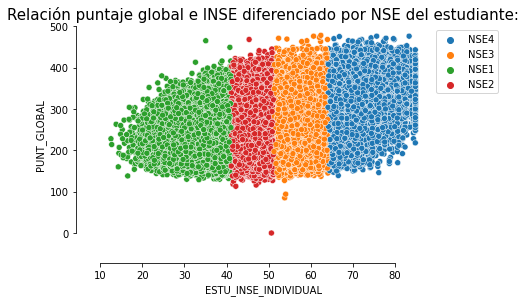

In [49]:
dispersion("ESTU_INSE_INDIVIDUAL", "PUNT_GLOBAL", "ESTU_NSE_INDIVIDUAL", "Relación puntaje global e INSE diferenciado por NSE del estudiante:")

In [39]:
data3["ESTU_INSE_INDIVIDUAL"].describe()

count    946325.000000
mean         50.817694
std           9.754656
min          12.538867
25%          43.983414
50%          50.333403
75%          56.832742
max          84.836366
Name: ESTU_INSE_INDIVIDUAL, dtype: float64

Se puede observar que en promedio la situción económica y social  de los estudiantes se ubica en un INSE de 50, lo que significa que pertencen a la categoría 3 NSE del nivel socioecómico. 

In [40]:
data3["PUNT_GLOBAL"].describe()

count    946325.000000
mean        258.419149
std          49.759993
min           0.000000
25%         220.000000
50%         256.000000
75%         293.000000
max         478.000000
Name: PUNT_GLOBAL, dtype: float64

En promedio los estudiantes tienden a obtener 258 puntos en la prueba. Se cuentan con datos atipico de 0, lo que s epodría deber a fallos en las maquinas calificadoras. Por otro lado hay estudiantes con resultados muy buenos, se evidencia que el puntaje máximo para este caso es de 478.

**A continuación se muestra la estadistica resumen de asociada a las pruebas de cada componente:**

In [41]:
data3["PUNT_C_NATURALES"].describe()

count    946325.000000
mean         51.528021
std          10.316848
min           0.000000
25%          44.000000
50%          51.000000
75%          59.000000
max         100.000000
Name: PUNT_C_NATURALES, dtype: float64

In [42]:
data3["PUNT_INGLES"].describe()

count    946325.000000
mean         51.292047
std          12.019432
min           0.000000
25%          43.000000
50%          50.000000
75%          58.000000
max         100.000000
Name: PUNT_INGLES, dtype: float64

In [43]:
data3["PUNT_LECTURA_CRITICA"].describe()

count    946325.000000
mean         53.757139
std           9.958048
min           0.000000
25%          47.000000
50%          54.000000
75%          61.000000
max         100.000000
Name: PUNT_LECTURA_CRITICA, dtype: float64

In [44]:
data3["PUNT_MATEMATICAS"].describe()

count    946325.000000
mean         51.325527
std          11.976896
min           0.000000
25%          43.000000
50%          51.000000
75%          60.000000
max         100.000000
Name: PUNT_MATEMATICAS, dtype: float64

In [45]:
data3["PUNT_SOCIALES_CIUDADANAS"].describe()

count    946325.000000
mean         50.254921
std          11.606150
min           0.000000
25%          41.000000
50%          50.000000
75%          59.000000
max         100.000000
Name: PUNT_SOCIALES_CIUDADANAS, dtype: float64

Matriz de correlación entre variables continuas:

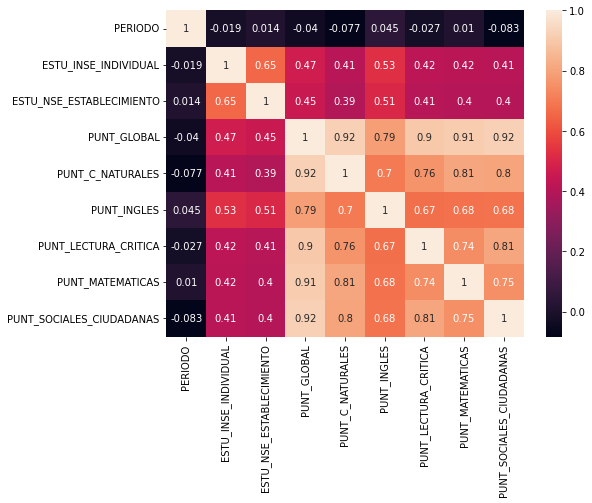

In [52]:
corr = data3.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)
plt.show()

Se puede observar que hay una correlación alta como debería de esperarse entre las variables que describen los puntajes de la prueba en cada componente y el puntaje global. Tambien se observa una correlación positiva relativamente fuerte entre la varieble INSE y los puntajes de la prueba. 

**Para realizar el análisis de las variables categoricas, las relacionaremos con las variables continuas, aprovechando el análisis gráfico:**

**Varibles del desempeño de los resultados de la prueba:**  
  
  ============================================================

  
Sobre la identidad de estudiantes (Genero y etnia):


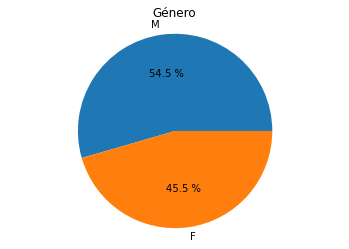

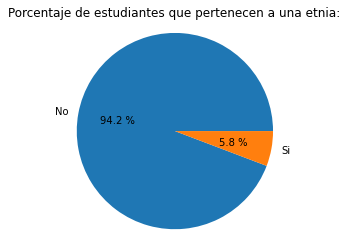

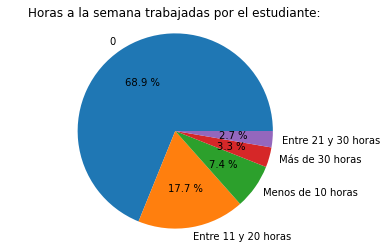

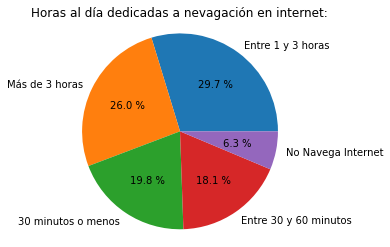

In [74]:
pastel("ESTU_GENERO", "Género")
pastel("ESTU_TIENEETNIA", "Porcentaje de estudiantes que pertenecen a una etnia:")

pastel("ESTU_DEDICACIONINTERNET", "Horas al día dedicadas a nevagación en internet:")

=============================================================  
  
**Variables socioeconómicas del estudiante:**   
  
  


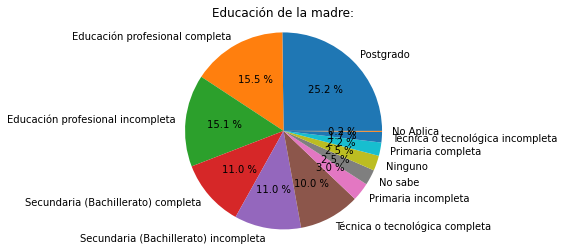

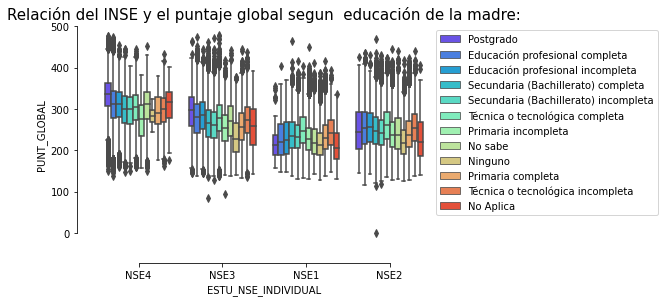

In [203]:
pastel("FAMI_EDUCACIONMADRE", "Educación de la madre:")
print("")
print("")
cajas("ESTU_NSE_INDIVIDUAL", "PUNT_GLOBAL", "FAMI_EDUCACIONMADRE","Relación del INSE y el puntaje global segun  educación de la madre:")

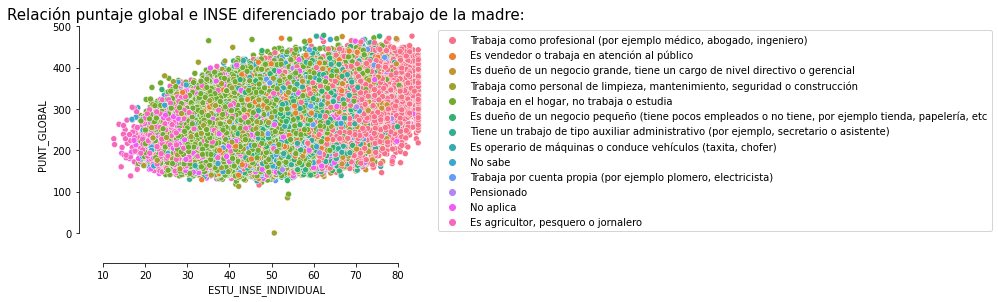

In [212]:
dispersion("ESTU_INSE_INDIVIDUAL", "PUNT_GLOBAL", "FAMI_TRABAJOLABORMADRE", "Relación puntaje global e INSE diferenciado por trabajo de la madre:")

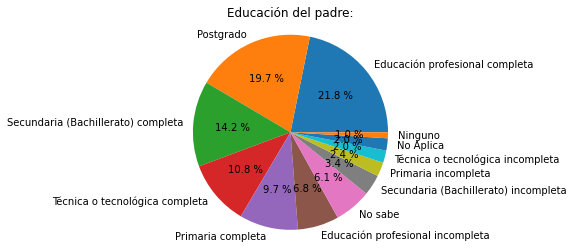

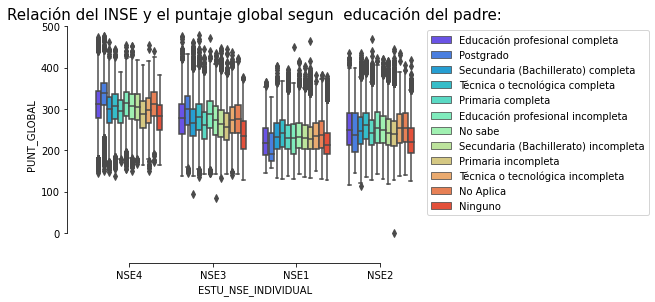

In [214]:
pastel("FAMI_EDUCACIONPADRE", "Educación del padre:")
print("")
print("")
cajas("ESTU_NSE_INDIVIDUAL", "PUNT_GLOBAL", "FAMI_EDUCACIONPADRE","Relación del INSE y el puntaje global segun  educación del padre:")

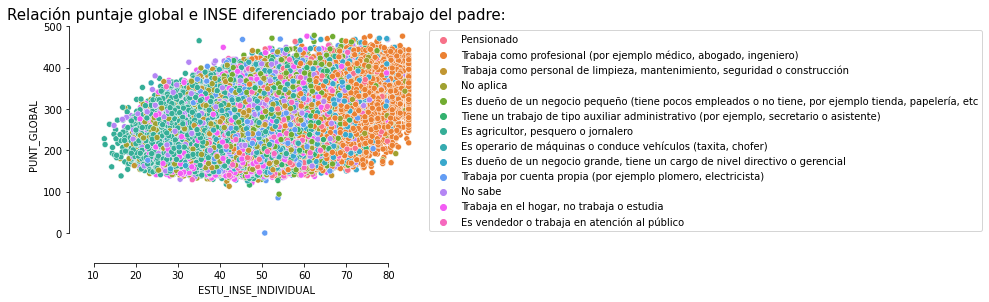

In [215]:
dispersion("ESTU_INSE_INDIVIDUAL", "PUNT_GLOBAL", "FAMI_TRABAJOLABORPADRE", "Relación puntaje global e INSE diferenciado por trabajo del padre:")

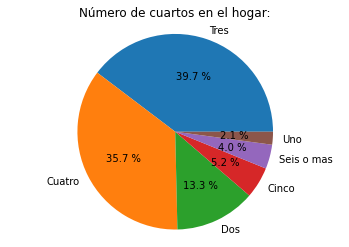

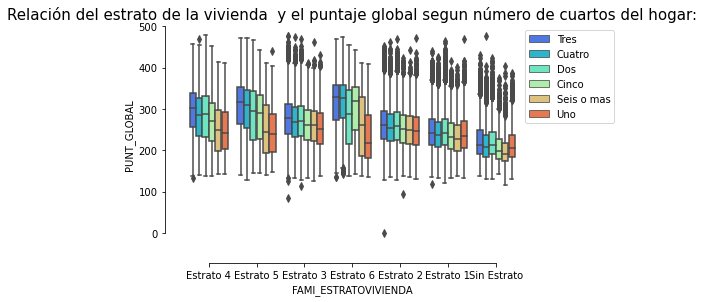

In [220]:
pastel("FAMI_CUARTOSHOGAR", "Número de cuartos en el hogar:")
print("")
print("")
cajas("FAMI_ESTRATOVIVIENDA", "PUNT_GLOBAL", "FAMI_CUARTOSHOGAR","Relación del estrato de la vivienda  y el puntaje global segun número de cuartos del hogar:")

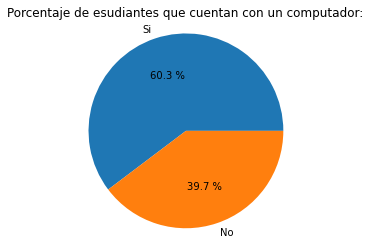

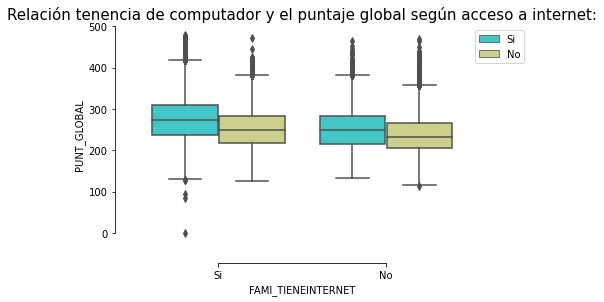

In [223]:
pastel("FAMI_TIENECOMPUTADOR", "Porcentaje de esudiantes que cuentan con un computador:")
print("")
print("")
cajas("FAMI_TIENEINTERNET", "PUNT_GLOBAL", "FAMI_TIENECOMPUTADOR","Relación tenencia de computador y el puntaje global según acceso a internet:")

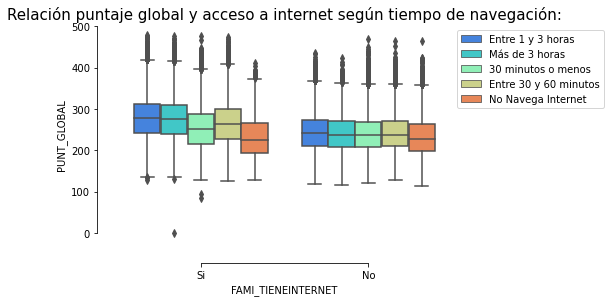

In [227]:
cajas("FAMI_TIENEINTERNET", "PUNT_GLOBAL", "ESTU_DEDICACIONINTERNET", "Relación puntaje global y acceso a internet según tiempo de navegación:")

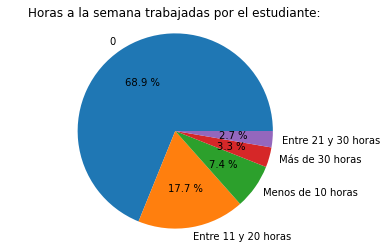

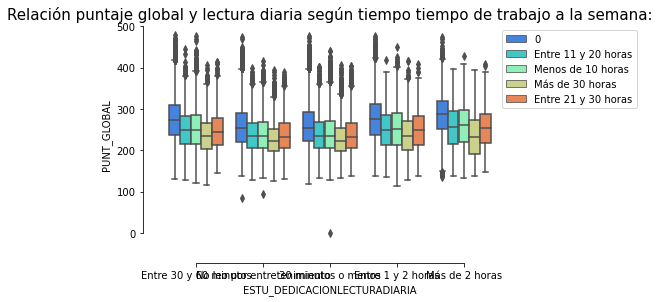

In [232]:
pastel("ESTU_HORASSEMANATRABAJA", "Horas a la semana trabajadas por el estudiante:")
cajas("ESTU_DEDICACIONLECTURADIARIA", "PUNT_GLOBAL", "ESTU_HORASSEMANATRABAJA", "Relación puntaje global y lectura diaria según tiempo de trabajo a la semana:")

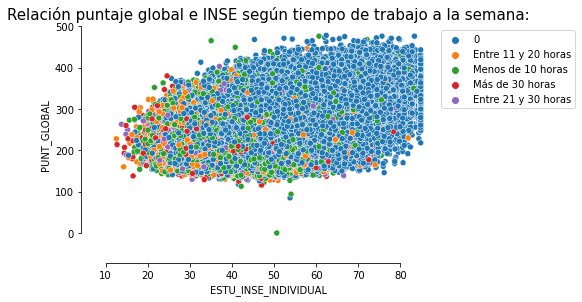

In [233]:
dispersion("ESTU_INSE_INDIVIDUAL", "PUNT_GLOBAL", "ESTU_HORASSEMANATRABAJA", "Relación puntaje global e INSE según tiempo de trabajo a la semana:")

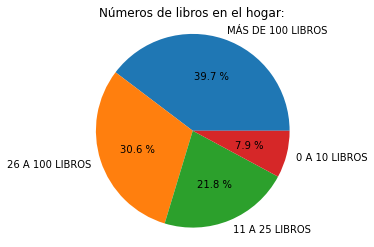

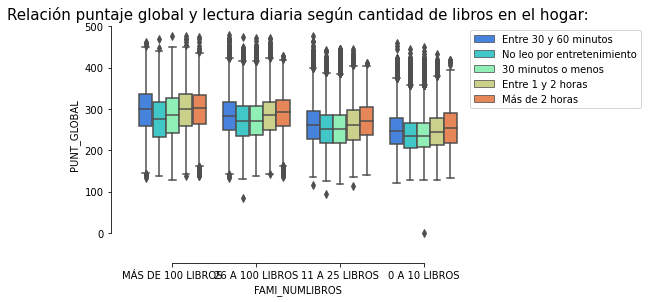

In [240]:
pastel("FAMI_NUMLIBROS", "Números de libros en el hogar:")
cajas("FAMI_NUMLIBROS", "PUNT_GLOBAL", "ESTU_DEDICACIONLECTURADIARIA", "Relación puntaje global y lectura diaria según cantidad de libros en el hogar:")

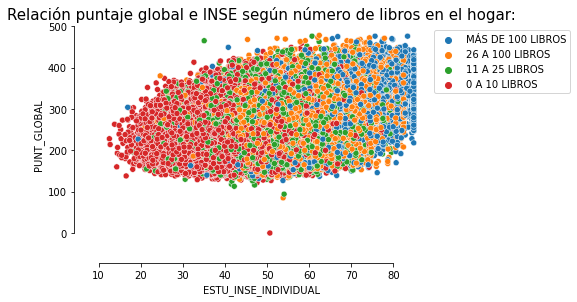

In [242]:
dispersion("ESTU_INSE_INDIVIDUAL", "PUNT_GLOBAL", "FAMI_NUMLIBROS", "Relación puntaje global e INSE según número de libros en el hogar:")

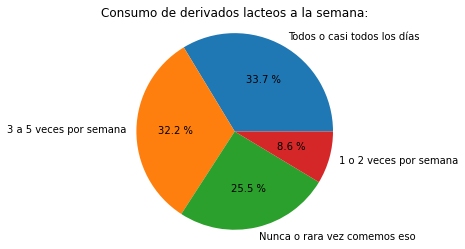

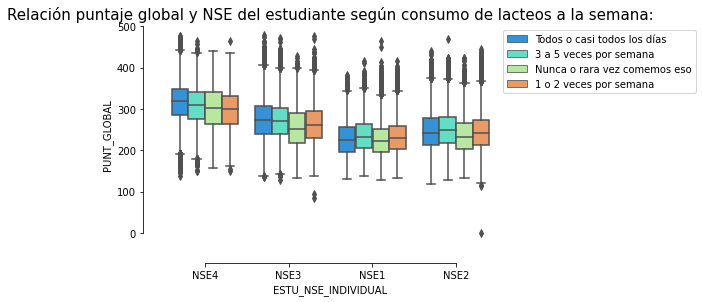

In [247]:
pastel("FAMI_COMELECHEDERIVADOS", "Consumo de derivados lacteos a la semana:")
cajas("ESTU_NSE_INDIVIDUAL", "PUNT_GLOBAL", "FAMI_COMELECHEDERIVADOS", "Relación puntaje global y NSE del estudiante según consumo de lacteos a la semana:")

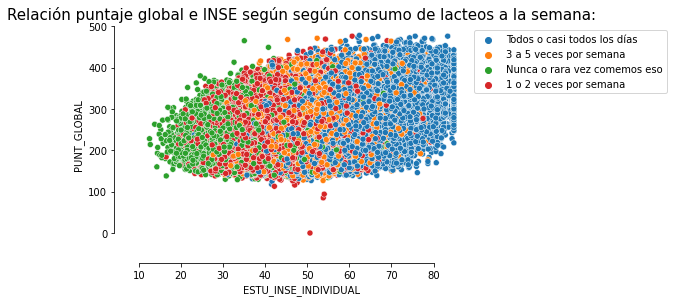

In [248]:
dispersion("ESTU_INSE_INDIVIDUAL", "PUNT_GLOBAL", "FAMI_COMELECHEDERIVADOS", "Relación puntaje global e INSE según según consumo de lacteos a la semana:")

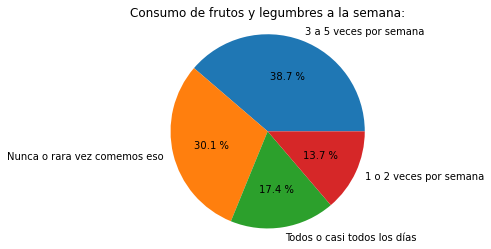

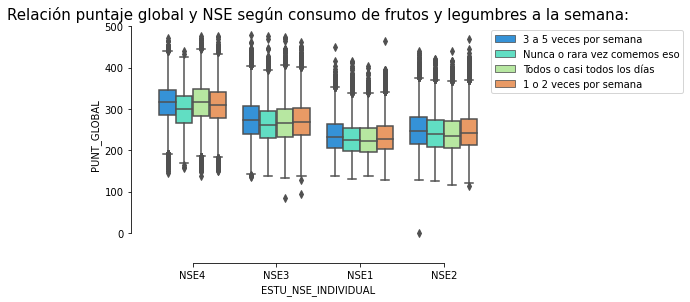

In [249]:
pastel("FAMI_COMECEREALFRUTOSLEGUMBRE", "Consumo de frutos y legumbres a la semana:")
cajas("ESTU_NSE_INDIVIDUAL", "PUNT_GLOBAL", "FAMI_COMECEREALFRUTOSLEGUMBRE", "Relación puntaje global y NSE según consumo de frutos y legumbres a la semana:")

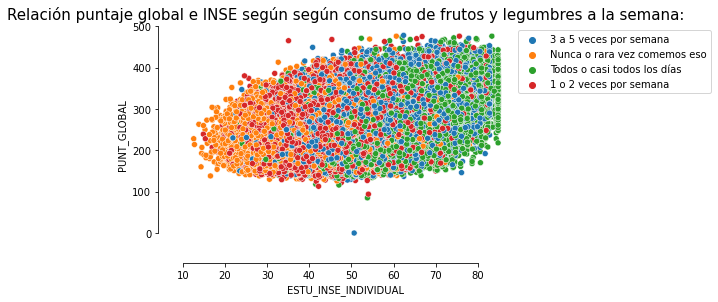

In [250]:
dispersion("ESTU_INSE_INDIVIDUAL", "PUNT_GLOBAL", "FAMI_COMECEREALFRUTOSLEGUMBRE", "Relación puntaje global e INSE según según consumo de frutos y legumbres a la semana:")

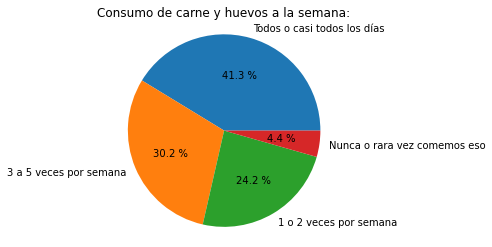

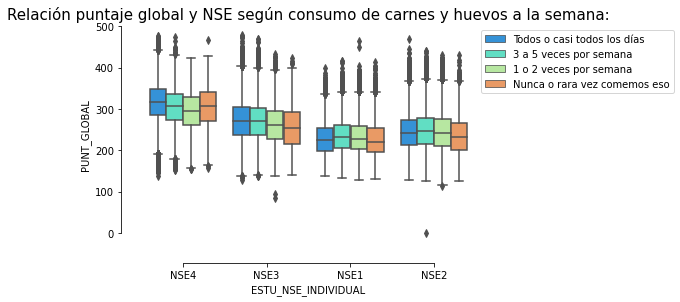

In [251]:
pastel("FAMI_COMECARNEPESCADOHUEVO", "Consumo de carne y huevos a la semana:")
cajas("ESTU_NSE_INDIVIDUAL", "PUNT_GLOBAL", "FAMI_COMECARNEPESCADOHUEVO", "Relación puntaje global y NSE según consumo de carnes y huevos a la semana:")

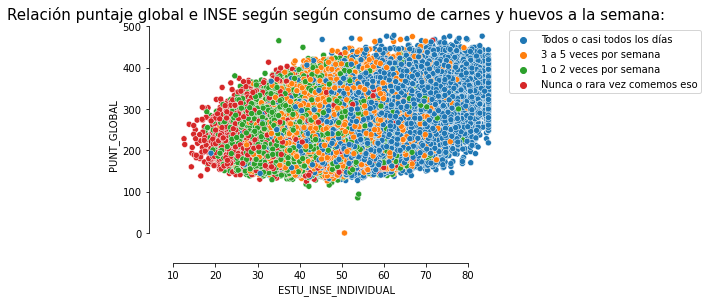

In [252]:
dispersion("ESTU_INSE_INDIVIDUAL", "PUNT_GLOBAL", "FAMI_COMECARNEPESCADOHUEVO", "Relación puntaje global e INSE según según consumo de carnes y huevos a la semana:")

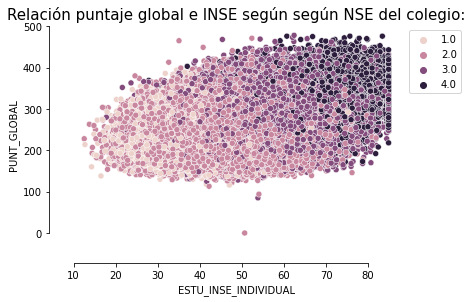

In [264]:
dispersion("ESTU_INSE_INDIVIDUAL", "PUNT_GLOBAL", "ESTU_NSE_ESTABLECIMIENTO", "Relación puntaje global e INSE según según NSE del colegio:")

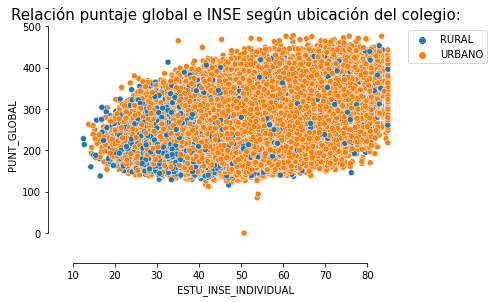

In [266]:
dispersion("ESTU_INSE_INDIVIDUAL", "PUNT_GLOBAL", "COLE_AREA_UBICACION", "Relación puntaje global e INSE según ubicación del colegio:")

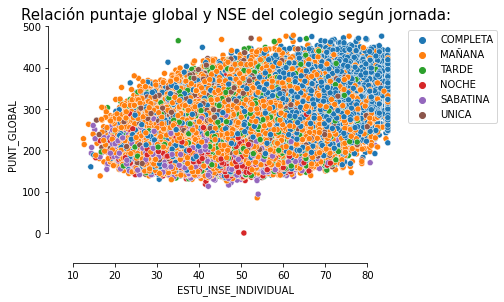

In [272]:
dispersion("ESTU_INSE_INDIVIDUAL", "PUNT_GLOBAL", "COLE_JORNADA", "Relación puntaje global y NSE del colegio según jornada:")

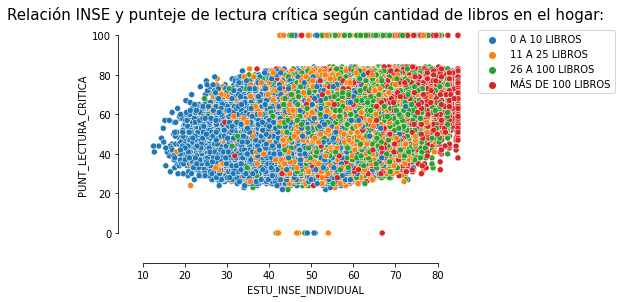

In [677]:
dispersion("ESTU_INSE_INDIVIDUAL", "PUNT_LECTURA_CRITICA", "FAMI_NUMLIBROS", "Relación INSE y punteje de lectura crítica según cantidad de libros en el hogar:" )

In [ ]:
#Histograma INSE, Puntaje global.
#Gráfica de correlación entre INSE y p. global


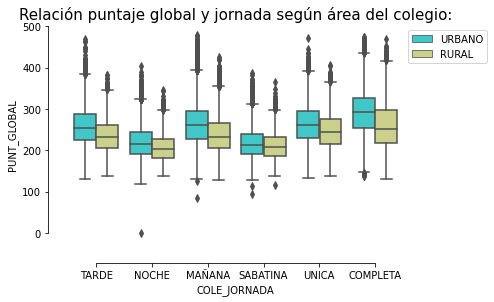

In [668]:
cajas("COLE_JORNADA", "PUNT_GLOBAL", "COLE_AREA_UBICACION", "Relación puntaje global y jornada según área del colegio:")

**Conclusión:**  

Se identifica que hay una relación marcada entre las variables NSE individual e INSE individual con las socioeconómicas. Esto se deba a que tanto NSE e INSE son resultado de componentes principales derivados de las variables asociadas a la educación, ocupación de los padres y las variables proxy del ingreso del hogar.  

Por otro lado, la variables NSE del establecimiento es resultado del analisis de compenentes principales de las variables asociadas al colegio. Clasificantola en 4 cartegorías que van desde 1 a 4, siendo 1 un sociocolegio con menor nivel economico y 4 un colegio un mayor nivel socioeconómico.  

Por tanto, se esperaría que las mejores variables para explicar el desempeño del la prueba son las variables INSE individual, NSE del establecimiento y quizás una variable como la etnia o el genero.

## Fase 3: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

Dado que las variables INSE individual y NSE del establecimeinto resumen en factores las variables socioeconomicas asociadas al estudiante y al colegio, las usaremos para explicar el puntaje global de la prueba.

Realizamos la programación de una par de funciones para determinar los datos de entrenamiento y prueba de la regresión lineal múltiple.

In [50]:
# Implementa tu respuesta en esta celda
def crear_train_test (x):
    
    xdf = pd.DataFrame(x[0])

    ydf =  pd.DataFrame(x[1], columns=["y"])
    nuevo = pd.concat([ydf, xdf], axis=1)
    train, test = train_test_split(nuevo, test_size=0.30, train_size = 0.70, random_state = 0)

#Definir entrenamiento
    trainy = train.iloc[:,0:1]
    trainx = train.iloc[:,1:]

    y_train  = trainy.iloc[:,0:1]["y"].to_list()
    x_train  = trainx.to_dict('list')
    
#Definir test
    testy = test.iloc[:,0:1]
    testx = test.iloc[:,1:]

    y_test  = testy.iloc[:,0:1]["y"].to_list()
    x_test  = testx.to_dict('list')


    final = (pd.DataFrame(x_train),pd.DataFrame(x_test), pd.Series(y_train), pd.Series(y_test))
    
    return final

def dividir_datos (df):
    dfy = df.iloc[:,0:1]
    dfx = df.iloc[:,1:]
    d_list  = dfx.to_dict('list')
    d_serie  = df.iloc[:,0:1]["y"].to_list()
    final = (pd.DataFrame(d_list), pd.Series(d_serie))
    return final

def crear_modelo(x):
    x_train = x[0]
    y_train = x[2]
    x_test = x[1]
    y_test = x[3]

    # Definir el modelo
    regr = linear_model.LinearRegression()
    # entrenar el modelo
    regr.fit(x_train.values, y_train.values)
    # prdic = regr.predict(x_test)
    # prdic
    
    return regr

def calcular_precision(m, x, y)-> float:
    predic = m.predict(x)
    r2 = r2_score(y, predic)
    return r2

In [52]:
indexNames = data3[ data3['PUNT_GLOBAL'] == 0 ].index
data3.drop(indexNames , inplace=True)


regr = data3[["PUNT_GLOBAL", "ESTU_INSE_INDIVIDUAL", "ESTU_NSE_ESTABLECIMIENTO", "ESTU_TIENEETNIA"]]
regr = pd.get_dummies(regr, columns = ["ESTU_NSE_ESTABLECIMIENTO"], drop_first = True)
regr = pd.get_dummies(regr, columns = ["ESTU_TIENEETNIA"], drop_first = True)
# regr = pd.get_dummies(regr, columns = ["ESTU_TIENEETNIA"], drop_first = True)
# regr = pd.get_dummies(regr, columns = ["FAMI_COMECARNEPESCADOHUEVO"], drop_first = True)

regr.rename(columns={'PUNT_GLOBAL':'y'},inplace=True)

C:\Users\57350\AppData\Local\Temp\ipykernel_7868\432550579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.drop(indexNames , inplace=True)


In [750]:
pip install fitter

  Using cached fitter-1.5.1.tar.gz (27 kB)
Note: you may need to restart the kernel to use updated packages.
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25608 sha256=e62b3b844653965deb5e1f4f38064a61ac0676614cd72a79880848ddca65eb7d
  Stored in directory: c:\users\57350\appdata\local\pip\cache\wheels\e2\61\91\27138abaab263acc3874ef03fe29140fb0d42d5cb1406ef635
Successfully built fitter


Revisamos a que distribución de probabilidad se ajustan los datos del puntaje global de la pruaba Saber 11:

Fitting 4 distributions: 100%|██████████| 4/4 [00:30<00:00,  7.52s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000022,1528.597200,-1.979542e+07,inf,0.025350,0.0
norm,0.000029,1516.963046,-1.955565e+07,inf,0.034674,0.0
lognorm,inf,inf,inf,inf,NaN,NaN
beta,inf,inf,inf,inf,NaN,NaN


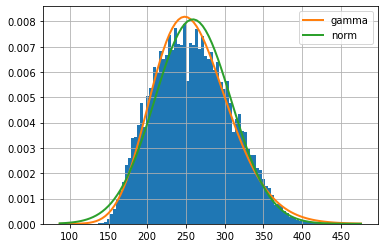

In [765]:
from fitter import Fitter, get_common_distributions, get_distributions


f = Fitter(regr["y"],distributions=['gamma','lognorm','beta','norm'])
f.fit()
f.summary()



Realizamos un test de correlación de la variable NSE del establecimiento e INSE individual con el puntaje global del estudiante:

In [54]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = regr['y'], y =  regr['ESTU_NSE_ESTABLECIMIENTO_2.0'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.3137656123302017
P-value:  0.0


In [55]:
corr_test = pearsonr(x = regr['y'], y =  regr['ESTU_INSE_INDIVIDUAL'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.4693027891478926
P-value:  0.0


Podemos observar que se ajustan a una distribución gamma y a una normal segun el criterio de información AIC.  

Relaizamos la regresión lineal múltiple:

In [56]:
#Modelo con Statsmodel
datos_regresion = dividir_datos(regr)

In [57]:
datos_ok = crear_train_test(datos_regresion)
x_test = datos_ok[1]
y_test = datos_ok[3]

x_train = datos_ok[0]
y_train = datos_ok[2]


In [58]:
#Modelo 3
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
x_train = sm.add_constant(x_train, prepend=True)
modelo3 = sm.OLS(endog=y_train, exog=x_train,)
modelo3 = modelo3.fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                 4.957e+04
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:29:11   Log-Likelihood:            -3.4230e+06
No. Observations:              662426   AIC:                         6.846e+06
Df Residuals:                  662420   BIC:                         6.846e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Se observa que los coeficientes acociadas a las variables son significativos individualmente, como tambien lo es modelo globalmente. 

In [59]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train
prediccion_train = modelo3.predict(exog = x_train)
residuos_train   = prediccion_train - y_train

**Comprobamos los supuestos de del modelo de regresión lienal gráficamente**

C:\Users\57350\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


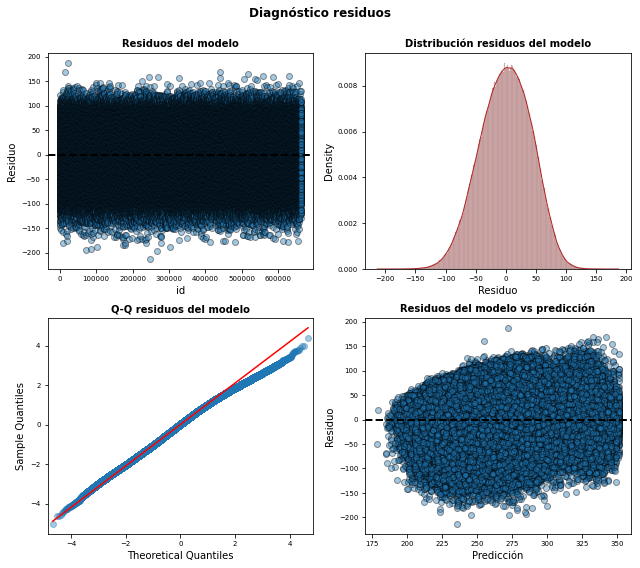

In [60]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))

# axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
# axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
#                 'k--', color = 'black', lw=2)
# axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
# axes[0, 0].set_xlabel('Real')
# axes[0, 0].set_ylabel('Predicción')
# axes[0, 0].tick_params(labelsize = 7)

axes[0, 0].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 0].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('id')
axes[0, 0].set_ylabel('Residuo')
axes[0, 0].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0, 1]
)

axes[0, 1].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[0, 1].set_xlabel("Residuo")
axes[0, 1].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 0], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 0].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 0].tick_params(labelsize = 7)

axes[1, 1].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[1, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1, 1].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[1, 1].set_xlabel('Predicción')
axes[1, 1].set_ylabel('Residuo')
axes[1, 1].tick_params(labelsize = 7)

# # Se eliminan los axes vacíos
# fig.delaxes(axes[2,0])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Se puede observar que el supuesto de normalidad se cumple, como tambien el de heterocedasticidad. 

In [61]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.kstest(residuos_train, stats.norm.cdf)
shapiro_test[1]


print("Shapiro test: norm:")
print("shapiro_test[1]")
print(f"valor p: {shapiro_test[1]}")


Shapiro test: norm:
shapiro_test[1]
valor p: 0.0


Al realizar la prueba de normalidad Kolmogórov-Smirnov se puede observar que el P valor indica que la distribución es normal. 

In [62]:
# realizar la prueba de Bresuch-Pagan
test = sms.het_breuschpagan (residuos_train, modelo3.model.exog)

print("Bresuch-Pagan test: homoscedasticity")
print(" ")
print(f"multiplicador de Lagrange: {test[0]}")
print(f"valor p: {test[1]}")
print(f"valor f: {test[2]}")
print(f"valor p f: {test[3]}")



Bresuch-Pagan test: homoscedasticity
 
multiplicador de Lagrange: 2277.82530352198
valor p: 0.0
valor f: 457.132836352313
valor p f: 0.0


Sin embargo, los resultados de la preba Breuschpagan de herterocedasticidad muestran que sí hay presencia de ella. Algo que  pareciera notarse graficamente. Al revisar la gráfica de residuos vs predicción muestra inicialmente que de haber heterocedasticidad podría estar en los puntajes bajos, pero el qqplot nos muestra que la heterocesaticidad está en los puntajes altos.  


**Conclusión:**

Se concluye que las variables socieconómicas guardan relación con los resultados globales de la prueba saber 11. A medida que la situación economica y social del estudiante mejora tambien lo hacen sus resultados. Se identifica que el no tener acceso a un computador, internet e incluso libros en el hogar, afectan los resultados en lectura crítica y globalmente, entre otros, como el colegio al que se asiste e incluso su tipo o carácter. 


respecto al modelo de regresión, éste explica mejor los puntajes bajos y medios. Lo que significa que obtener o perder un punto de calidad en la prueba puede tener un comportamiento lineal u homogeneo. Es decir que para poder explicar los resultados altos no es aprobiado una regresión con una relación lineal, y seria apropiada que explique comportamientos exponenciales. Tal como se planeta el modelo de regresión con las variobles seleccionadas se estaría explicando el 80% de los resultados, que no son preciamente los más altos. Quizas se deba a que las variables recolectadas por el ICFES no permiten identificar los efectos de la situación socieconómica sobre los mejores resultados, por tanto se hace necesario usar otros metodos como un análisis envolvente de datos o fronteras estocásticas. 

## Fase 4

Deberás elegir y realizar una de las dos alternativas que se encuentran a continuación.

### Alternativa 1: desarrollar una herramienta interactiva de análisis

En esta fase desarrollarás, a partir de alguno de los análisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas guía:

* ¿Cuál o cuáles preguntas podrá hacerle el usuario a la herramienta y cómo aporta la respuesta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

Se realiza por medio de widgets e interact dos gráficos dinámicos con los cuales el usuario puede interactuar. El primero permite seleccionar dos variables categoricas y una variable de etiquetas para realizar gráficos de cajas.  

El segundo permite seleccionar dos variables continuas y una categorica para diferenciar los puntos de un gráfico de dispersión. 

Esta herramienta es útil para identificar relaciones o patrones entra la variable de salida con las demás del detaframe. Adicional, se abordan dos tipos de gráficas para explorar relaciones entre variables categoricas y continuas. 

In [63]:
# Implementa tu respuesta en esta celda:

Exogena = ["ESTU_NSE_INDIVIDUAL", "FAMI_EDUCACIONMADRE", "FAMI_EDUCACIONPADRE", "FAMI_TRABAJOLABORMADRE", 
                 "FAMI_TRABAJOLABORPADRE", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE", 
                 "FAMI_COMELECHEDERIVADOS", "FAMI_CUARTOSHOGAR", "FAMI_ESTRATOVIVIENDA", "FAMI_NUMLIBROS", 
                 "FAMI_PERSONASHOGAR", "FAMI_SITUACIONECONOMICA", "FAMI_TIENEAUTOMOVIL", "FAMI_TIENECOMPUTADOR", 
                 "FAMI_TIENECONSOLAVIDEOJUEGOS", "FAMI_TIENEHORNOMICROOGAS", "FAMI_TIENEINTERNET", "FAMI_TIENELAVADORA", 
                 "FAMI_TIENEMOTOCICLETA", "FAMI_TIENESERVICIOTV", "ESTU_HORASSEMANATRABAJA", "ESTU_GENERO", "ESTU_TIENEETNIA", 
                 "ESTU_NSE_ESTABLECIMIENTO", "COLE_AREA_UBICACION", "COLE_BILINGUE", "COLE_CALENDARIO", "COLE_CARACTER", 
                 "COLE_DEPTO_UBICACION", "COLE_GENERO", "COLE_JORNADA", "COLE_NATURALEZA", "ESTU_DEDICACIONINTERNET", 
                 "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET"]


Etiqueta = ["ESTU_NSE_INDIVIDUAL", "FAMI_EDUCACIONMADRE", "FAMI_EDUCACIONPADRE", "FAMI_TRABAJOLABORMADRE", 
                 "FAMI_TRABAJOLABORPADRE", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE", 
                 "FAMI_COMELECHEDERIVADOS", "FAMI_CUARTOSHOGAR", "FAMI_ESTRATOVIVIENDA", "FAMI_NUMLIBROS", 
                 "FAMI_PERSONASHOGAR", "FAMI_SITUACIONECONOMICA", "FAMI_TIENEAUTOMOVIL", "FAMI_TIENECOMPUTADOR", 
                 "FAMI_TIENECONSOLAVIDEOJUEGOS", "FAMI_TIENEHORNOMICROOGAS", "FAMI_TIENEINTERNET", "FAMI_TIENELAVADORA", 
                 "FAMI_TIENEMOTOCICLETA", "FAMI_TIENESERVICIOTV", "ESTU_HORASSEMANATRABAJA", "ESTU_GENERO", "ESTU_TIENEETNIA", 
                 "ESTU_NSE_ESTABLECIMIENTO", "COLE_AREA_UBICACION", "COLE_BILINGUE", "COLE_CALENDARIO", "COLE_CARACTER", 
                 "COLE_DEPTO_UBICACION", "COLE_GENERO", "COLE_JORNADA", "COLE_NATURALEZA", "ESTU_DEDICACIONINTERNET", 
                 "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET"]

Endogena = ["PUNT_SOCIALES_CIUDADANAS", "PUNT_MATEMATICAS", "PUNT_LECTURA_CRITICA", 
                 "PUNT_INGLES", "PUNT_C_NATURALES", "PUNT_GLOBAL", "ESTU_INSE_INDIVIDUAL"] 




In [64]:
def plot_cajas( Endogena, Exogena, Etiqueta):
    sns.boxplot(x=Exogena, y=Endogena,hue=Etiqueta,data=data3,palette="rainbow")
    sns.despine(offset=20, trim=True)
    sns.figsize =(1, 200)
    plt.legend(loc = 2, bbox_to_anchor = (1,1))
    plt.show()
    
def plot_dispersion(Endogena, Exogena, Etiqueta):
    sns.scatterplot(x=Exogena, y=Endogena, hue=Etiqueta, data = data3)
    sns.despine(offset=20, trim=True)
    sns.figsize =(1, 200)    
    plt.legend(loc = 2, bbox_to_anchor = (1,1))

In [65]:
interact(plot_cajas, Exogena = Exogena, Endogena = Endogena , Etiqueta = Etiqueta )

interactive(children=(Dropdown(description='Endogena', options=('PUNT_SOCIALES_CIUDADANAS', 'PUNT_MATEMATICAS'…

<function __main__.plot_cajas(Endogena, Exogena, Etiqueta)>

In [66]:
interact(plot_dispersion, Exogena = Endogena, Endogena = Endogena , Etiqueta = Etiqueta )

interactive(children=(Dropdown(description='Endogena', options=('PUNT_SOCIALES_CIUDADANAS', 'PUNT_MATEMATICAS'…

<function __main__.plot_dispersion(Endogena, Exogena, Etiqueta)>